In [74]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv(r"C:\Users\islem\spamHam.csv")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [76]:
df =df.dropna(axis='columns')
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [77]:
df = df.rename(columns={'v1':'label', 'v2':'message'})
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


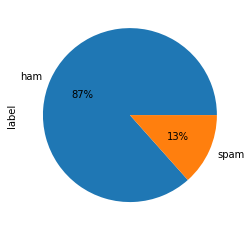

In [78]:
df['label'].value_counts().plot(kind='pie', autopct='%1.0f%%')

In [79]:
from nltk.corpus import stopwords
import re 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus =[]
for i in range(0,len(df.message)):
    review = re.sub('[^a-zA-Z]',' ',df['message'][i])
    review = review.lower()
    review = review.split()
    review =[ ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [80]:
#┼bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
x = cv.fit_transform(corpus).toarray()
#print(cv.get_feature_names())
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [81]:
y = pd.get_dummies(df['label'])
y= y.iloc[:,1]
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: spam, Length: 5572, dtype: uint8

# naive_bayes

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=0)

In [83]:
from sklearn.naive_bayes import MultinomialNB  
model = MultinomialNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [84]:
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test,y_pred)
confusion_m

array([[943,   6],
       [  9, 157]], dtype=int64)

In [85]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9865470852017937

# SVM 

In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=0)

In [101]:
from sklearn.svm import SVC
modelSvm = SVC (kernel = 'rbf', random_state = 0)
modelSvm.fit(x_train,y_train)
y_pred2=modelSvm.predict(x_test)
y_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [102]:
from sklearn.metrics import confusion_matrix
confusion_m2 = confusion_matrix(y_test,y_pred2)
confusion_m2

array([[949,   0],
       [ 25, 141]], dtype=int64)

In [103]:
from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(y_test,y_pred2)
accuracy2

0.9775784753363229

# DecisionTreeClassifier

In [90]:
from sklearn import tree 

In [91]:
model = tree.DecisionTreeClassifier()

In [92]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [93]:
y_pred3=modelSvm.predict(x_test)

In [94]:
confusion_m3= confusion_matrix(y_test,y_pred3)
confusion_m3

array([[949,   0],
       [ 25, 141]], dtype=int64)

In [95]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred2)
accuracy

0.9775784753363229

# pie

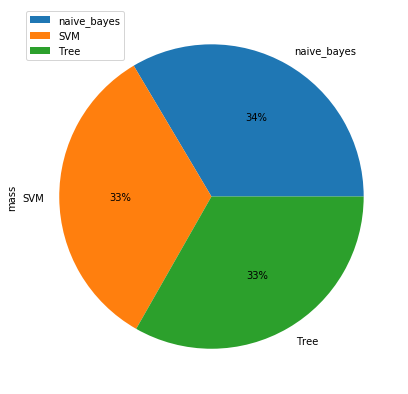

In [96]:
df = pd.DataFrame({'mass': [0.9865470852017937, 0.9775784753363229 ,0.9775784753363229 ]},
                  index=['naive_bayes', 'SVM', 'Tree'])
plot = df.plot.pie(y='mass', figsize=(7,7), autopct='%1.0f%%')